<a href="https://colab.research.google.com/github/shreya82004/Development-of-Interactive-Cyber-Threat-Visualization-Dashboard-/blob/main/python__Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("cyber_threat_dataset.csv")

df.head()
df.shape
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   incident_id       10 non-null     object
 1   timestamp         10 non-null     object
 2   src_ip            10 non-null     object
 3   dest_ip           10 non-null     object
 4   src_country       10 non-null     object
 5   dest_country      10 non-null     object
 6   attack_type       10 non-null     object
 7   severity          10 non-null     object
 8   protocol          10 non-null     object
 9   src_port          10 non-null     int64 
 10  dest_port         10 non-null     int64 
 11  bytes_sent        10 non-null     int64 
 12  bytes_received    10 non-null     int64 
 13  packets           10 non-null     int64 
 14  duration_sec      10 non-null     int64 
 15  response_time_ms  10 non-null     int64 
 16  action_taken      10 non-null     object
 17  attack_status     1

,incident_id,timestamp,src_ip,dest_ip,src_country,dest_country,attack_type,severity,protocol,src_port,dest_port,bytes_sent,bytes_received,packets,duration_sec,response_time_ms,action_taken,attack_status,is_malicious
count,10,10,10,10,10,10,10,10,10,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000,10,10,10.000000
unique,10,10,10,10,6,1,8,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,4,NaN
top,INC001,2025-01-01 10:12:45,185.220.101.5,10.0.0.12,India,India,Normal Traffic,High,TCP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Allowed,Mitigated,NaN
freq,1,1,1,1,4,10,3,3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44020.900000,5635.30000,208420.000000,66820.000000,325.500000,18.70000,112.800000,NaN,NaN,0.700000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16833.215653,16150.87578,327223.314165,104154.007764,366.503373,15.61374,79.607091,NaN,NaN,0.483046
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.000000,22.00000,7200.000000,5000.000000,40.000000,4.00000,18.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40946.750000,32.00000,12750.000000,9900.000000,83.750000,9.25000,41.250000,NaN,NaN,0.250000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49515.500000,261.50000,36000.000000,17000.000000,180.000000,14.00000,100.000000,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51986.500000,444.50000,197500.000000,84000.000000,395.000000,21.00000,172.500000,NaN,NaN,1.000000


In [ ]:
df.isnull().sum()
df = df.drop_duplicates()

# Example: convert timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


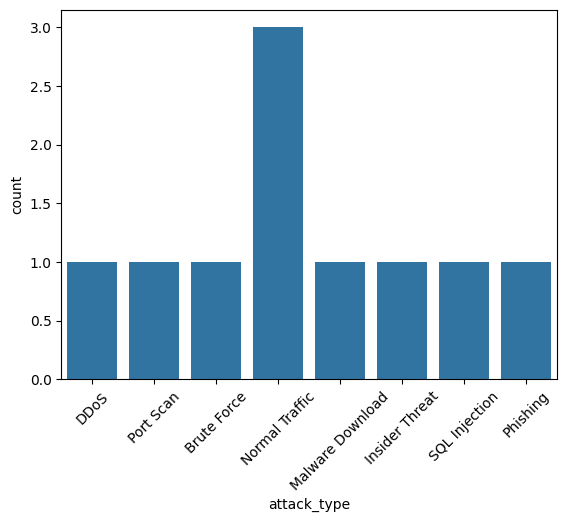

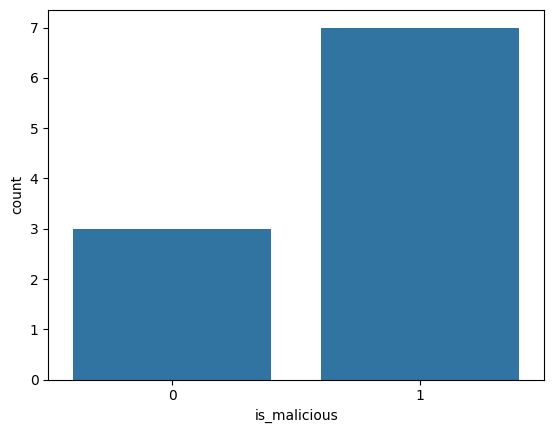

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='attack_type', data=df)
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='is_malicious', data=df)
plt.show()


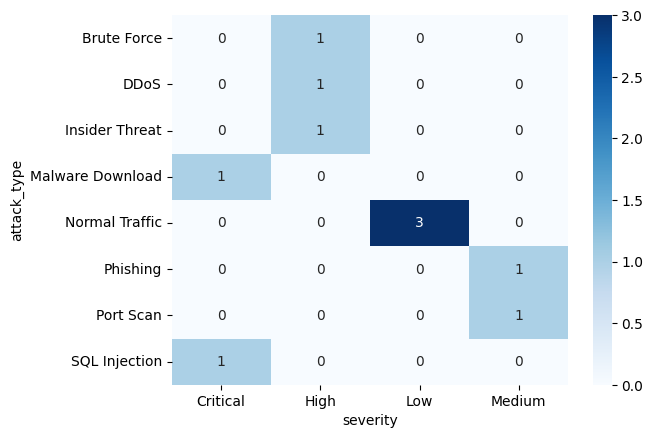

In [ ]:
pd.crosstab(df['attack_type'], df['severity'])

sns.heatmap(pd.crosstab(df['attack_type'], df['severity']),
            annot=True, fmt='d', cmap='Blues')
plt.show()


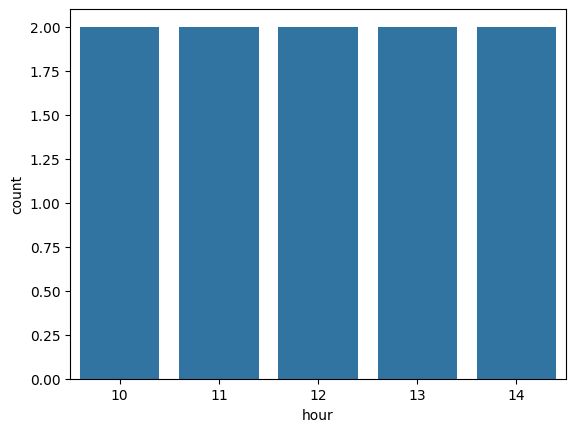

In [ ]:
df['hour'] = df['timestamp'].dt.hour

sns.countplot(x='hour', data=df)
plt.show()


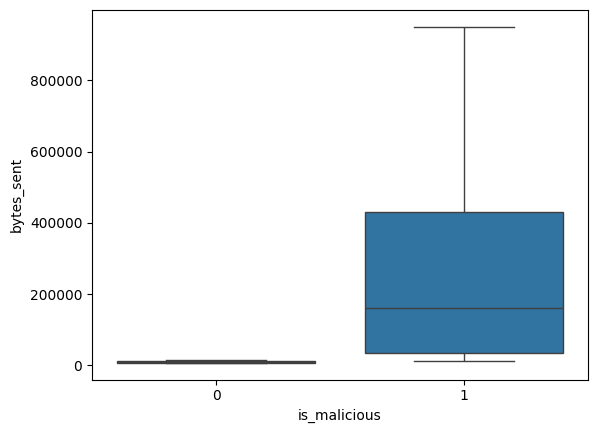

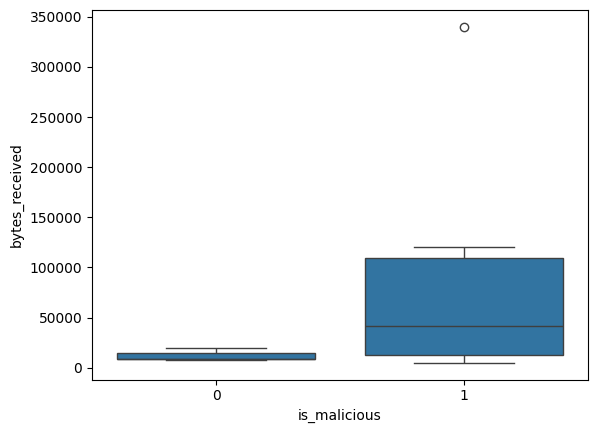

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='is_malicious', y='bytes_sent', data=df)
plt.show()

sns.boxplot(x='is_malicious', y='bytes_received', data=df)
plt.show()



In [ ]:
df['src_country'].value_counts().head(10)

pd.crosstab(df['src_country'], df['is_malicious']).sort_values(1, ascending=False)


is_malicious,0,1
src_country,,
India,2,2
Germany,0,1
Russia,0,1
UK,0,1
USA,1,1
Ukraine,0,1


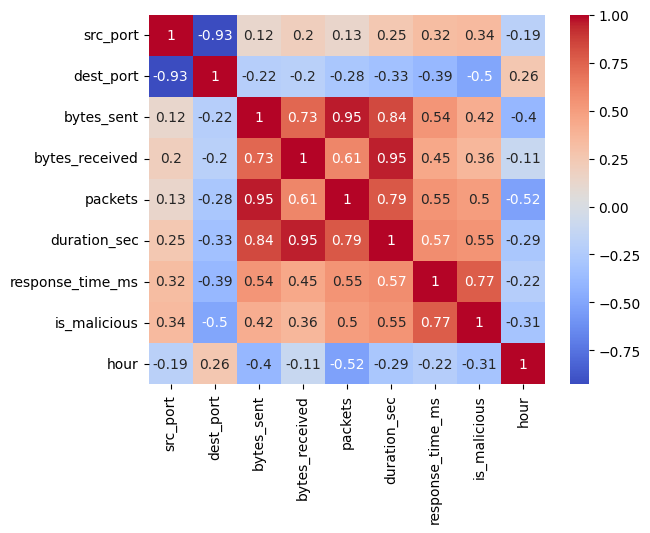

In [ ]:
corr = df.select_dtypes(include='number').corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
df['severity_score'] = df['severity'].map({
    'Low':1, 'Medium':2, 'High':3, 'Critical':4
})

df['traffic_intensity'] = df['bytes_sent'] / (df['duration_sec'] + 1)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['attack_type','protocol','src_country']:
    df[col] = le.fit_transform(df[col])


In [ ]:
X = df.drop(columns=['is_malicious'])
y = df['is_malicious']



In [ ]:
from sklearn.model_selection import train_test_split

y = df['is_malicious']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
X_train.dtypes


,0
incident_id,object
timestamp,datetime64[ns]
src_ip,object
dest_ip,object
src_country,int64
dest_country,object
attack_type,int64
severity,object
protocol,int64
src_port,int64


In [ ]:
X = df.drop(columns=['is_malicious'])

# Drop non-ML columns
X = X.drop(columns=[
    'incident_id',
    'src_ip',
    'dst_ip',
    'timestamp'
], errors='ignore')


In [ ]:
X = X.select_dtypes(include=['int64', 'float64'])



In [ ]:
X.dtypes


,0
src_country,int64
attack_type,int64
protocol,int64
src_port,int64
dest_port,int64
bytes_sent,int64
bytes_received,int64
packets,int64
duration_sec,int64
response_time_ms,int64


In [ ]:
from sklearn.model_selection import train_test_split

y = df['is_malicious']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[0 1]
 [0 1]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
import pandas as pd

feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


,0
bytes_sent,0.172043
packets,0.155317
response_time_ms,0.150538
protocol,0.135177
severity_score,0.107527
duration_sec,0.104967
bytes_received,0.053763
src_port,0.047619
traffic_intensity,0.024066
dest_port,0.021505


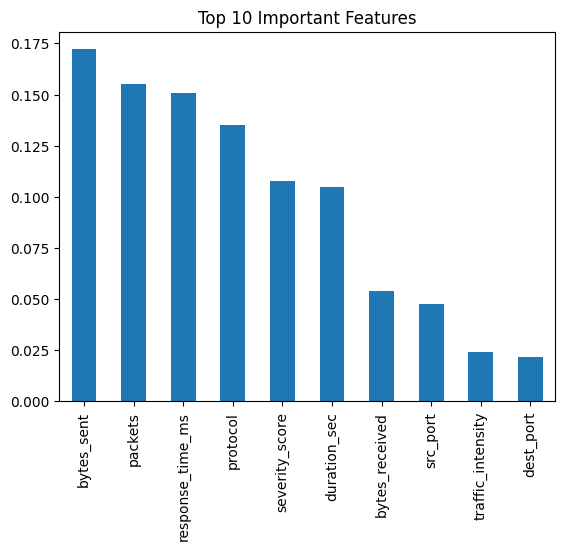

In [ ]:
import matplotlib.pyplot as plt

feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Important Features")
plt.show()



In [ ]:
y.value_counts(normalize=True)


,proportion
is_malicious,
1,0.7
0,0.3


In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)



In [ ]:
!pip install --upgrade gradio


In [ ]:
import joblib
joblib.dump(model, "rf_model.pkl")


['rf_model.pkl']

In [ ]:
import pandas as pd
import joblib

df = pd.read_csv("cyber_threat_dataset.csv")
model = joblib.load("rf_model.pkl")

print("Model loaded:", type(model))
print("Dataset shape:", df.shape)

# numeric features
FEATURES = (
    df.select_dtypes(include=["int64", "float64"])
      .drop(columns=["is_malicious"], errors="ignore")
      .columns
      .tolist()
)

print("Number of features:", len(FEATURES))
print("First 5 features:", FEATURES[:5])


Model loaded: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Dataset shape: (10, 19)
Number of features: 7
First 5 features: ['src_port', 'dest_port', 'bytes_sent', 'bytes_received', 'packets']


In [ ]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("cyber_threat_dataset.csv")

# Prepare features (IMPORTANT)
X = (
    df.select_dtypes(include=["int64", "float64"])
      .drop(columns=["is_malicious"], errors="ignore")
)
y = df["is_malicious"]

print("X shape:", X.shape)
print("y distribution:\n", y.value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)

print("✅ Model trained successfully")

# SAVE TRAINED MODEL
joblib.dump(model, "rf_model.pkl")
print("✅ Trained model saved as rf_model.pkl")


X shape: (10, 7)
y distribution:
 is_malicious
1    7
0    3
Name: count, dtype: int64
✅ Model trained successfully
✅ Trained model saved as rf_model.pkl


In [ ]:
import joblib

model = joblib.load("rf_model.pkl")

# quick check
sample = X_train.iloc[:5]
probs = model.predict_proba(sample)

print("✅ Loaded model is fitted")
print("Prediction shape:", probs.shape)


✅ Loaded model is fitted
Prediction shape: (5, 2)


In [ ]:
import gradio as gr
import pandas as pd
import joblib
import plotly.express as px

# -------------------------
# LOAD DATA & TRAINED MODEL
# -------------------------
df = pd.read_csv("cyber_threat_dataset.csv")
model = joblib.load("rf_model.pkl")

# IMPORTANT: same features used during training
FEATURES = (
    df.select_dtypes(include=["int64", "float64"])
      .drop(columns=["is_malicious"], errors="ignore")
      .columns
      .tolist()
)

# -------------------------
# ML DASHBOARD FUNCTION
# -------------------------
def run_ml_dashboard():
    # simulate live traffic
    live_df = df.sample(frac=0.2)

    X_live = live_df[FEATURES].fillna(0)

    # ML prediction
    probs = model.predict_proba(X_live)[:, 1]
    live_df["ml_prediction"] = (probs > 0.5).astype(int)

    total_incidents = len(live_df)
    malicious_pct = round(live_df["ml_prediction"].mean() * 100, 2)

    fig = px.bar(
        live_df["attack_type"]
        .value_counts()
        .rename_axis("Attack Type")
        .reset_index(name="Count"),
        x="Attack Type",
        y="Count",
        title="ML-Predicted Live Attack Distribution"
    )

    return total_incidents, malicious_pct, fig


# -------------------------
# DASHBOARD UI
# -------------------------
with gr.Blocks() as dashboard:
    gr.Markdown("# 🤖 ML-Based Cyber Threat Dashboard")

    gr.Markdown(
        "This dashboard uses a **Random Forest model** to predict malicious traffic "
        "on simulated live network data."
    )

    run_btn = gr.Button("🔄 Run Live ML Prediction")

    total_box = gr.Number(label="Live Incidents")
    malicious_box = gr.Number(label="Predicted Malicious % (ML)")
    plot = gr.Plot()

    run_btn.click(
        fn=run_ml_dashboard,
        outputs=[total_box, malicious_box, plot]
    )

dashboard.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://28ead4fea591b838c4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
